In [2]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [4]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [5]:
def cut_reshape(arr):
    arr_cut = cut_X(arr)
    arr_RF = reshape_RF(arr_cut)
    return arr_RF

In [6]:
unet_dir = os.path.join(data_dir, "trained_models",
                        "UNet_training_generator_1500epochs")

In [6]:
from sklearn.model_selection import train_test_split

In [26]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["y"]
y_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

X_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["y"]
y_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["dist"]

X_10mm = np.load(os.path.join(data_folder, "Xy_10mm.npz"))["y"]
y_10mm = np.load(os.path.join(data_folder, "Xy_10mm.npz"))["dist"]

X_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["y"]
y_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["dist"]

X_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["y"]
y_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["dist"]

X_25mm = np.load(os.path.join(data_folder, "Xy_25mm.npz"))["y"]
y_25mm = np.load(os.path.join(data_folder, "Xy_25mm.npz"))["dist"]

X_30mm = np.load(os.path.join(data_folder, "Xy_30mm.npz"))["y"]
y_30mm = np.load(os.path.join(data_folder, "Xy_30mm.npz"))["dist"]

X_35mm = np.load(os.path.join(data_folder, "Xy_35mm.npz"))["y"]
y_35mm = np.load(os.path.join(data_folder, "Xy_35mm.npz"))["dist"]



In [27]:
X_1mm_RF = cut_reshape(X_1mm)

X_2mm_RF = cut_reshape(X_2mm)

X_3mm_RF = cut_reshape(X_3mm)

X_4mm_RF = cut_reshape(X_4mm)

X_10mm_RF = cut_reshape(X_10mm)

X_15mm_RF = cut_reshape(X_15mm)

X_20mm_RF = cut_reshape(X_20mm)

X_25mm_RF = cut_reshape(X_25mm)

X_30mm_RF = cut_reshape(X_30mm)

X_35mm_RF = cut_reshape(X_35mm)


In [9]:
X = np.vstack((X_1mm_RF, X_2mm_RF, X_3mm_RF, X_4mm_RF, 
              X_10mm_RF, X_15mm_RF, X_20mm_RF, X_25mm_RF,
              X_30mm_RF, X_35mm_RF))

In [10]:
y = np.hstack((y_1mm, y_2mm, y_3mm, y_4mm, y_10mm, y_15mm, y_20mm, y_25mm, y_30mm, y_35mm))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
training_indices, test_indices = train_test_split(indices, test_size=0.20,
                                                   random_state=42, stratify=stratify_arr)

In [1]:
np.savez_compressed(os.path.join(data_folder,"RF_train_test_ground_truth_80_20.npz"), X_train=X_train, X_test=X_test,
                   y_train=y_train, y_test=y_test)

NameError: name 'np' is not defined

In [7]:
Xy = np.load(os.path.join(data_folder, "RF_train_test_ground_truth_80_20.npz"))

In [10]:
Xy["X_train"][0].shape

(272000,)

In [8]:
X_train = Xy["X_train"]
y_train = Xy["y_train"]


In [12]:
rf = RandomForestRegressor(max_depth=8, random_state=42, n_estimators=30,n_jobs=2, verbose=2)

In [13]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  5.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
           oob_score=False, random_state=42, verbose=2, warm_start=False)

In [12]:
X_test = Xy["X_test"]
y_test = Xy["y_test"]



In [16]:
gt_preds = rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [17]:
mean_squared_error(y_test, gt_preds)

0.20155231481481484

In [9]:
rf30 = RandomForestRegressor(random_state=42, n_estimators=30,n_jobs=2, verbose=2)

In [10]:
rf30.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 30building tree 2 of 30

building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  6.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
           oob_score=False, random_state=42, verbose=2, warm_start=False)

In [15]:
np.savez_compressed(os.path.join(data_dir,"RF30_trained_model.npz"),rf = rf30)

In [13]:
gt_preds_rf30 = rf30.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [14]:
mean_squared_error(y_test, gt_preds_rf30)

0.1988740740740741

In [24]:
rf50 = RandomForestRegressor(random_state=42, n_estimators=50,n_jobs=2, verbose=2)
rf50.fit(X_train,y_train)

gt_preds_rf50 = rf50.predict(X_test)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  8.2min


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 10.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


TypeError: mean_squared_error() got an unexpected keyword argument 'gt_preds_rf3'

In [25]:
mean_squared_error(y_test, gt_preds_rf50)

0.20365733333333333

In [29]:
mean_squared_error(y_1mm, rf30.predict(X_1mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.0008444444444444451

In [30]:
mean_squared_error(y_2mm, rf30.predict(X_2mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.004766666666666669

In [31]:
mean_squared_error(y_3mm, rf30.predict(X_3mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.012444444444444445

In [32]:
mean_squared_error(y_4mm, rf30.predict(X_4mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.009203703703703704

In [33]:
mean_squared_error(y_10mm, rf30.predict(X_10mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.010814814814814812

In [34]:
mean_squared_error(y_15mm, rf30.predict(X_15mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.01814444444444444

In [35]:
mean_squared_error(y_20mm, rf30.predict(X_20mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.021607407407407447

In [36]:
mean_squared_error(y_25mm, rf30.predict(X_25mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.056851851851851855

In [37]:
mean_squared_error(y_30mm, rf30.predict(X_30mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.05064814814814824

In [38]:
mean_squared_error(y_35mm, rf30.predict(X_35mm_RF))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.35194444444444434

In [63]:
indx = np.where(np.abs(rf30.predict(X_35mm_RF)-y_35mm)>=0.5)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [64]:
mean_squared_error(y_35mm[indx], rf30.predict(X_35mm_RF[indx]))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


5.830246913580245

In [69]:
bad = np.where(np.abs(rf30.predict(X_35mm_RF)-y_35mm)>1)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


31.833333333333332


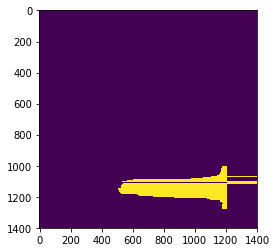

In [81]:
i=5
plt.imshow(X_35mm[bad][i][...,0])
print(rf30.predict(X_35mm_RF)[bad][i])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


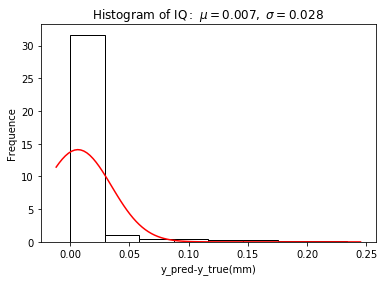

In [41]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = rf30.predict(X_1mm_RF)-y_1mm
mean,std=norm.fit(data)

plt.hist(data, bins=8, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

In [ ]:
X_1mm_Unet = np.load(os.path.join(unet_dir, "Xy_1mm_predicted_UNet.npz"))["y"]
y_1mm_Unet = np.load(os.path.join(unet_dir, "Xy_1mm_predicted_UNet.npz"))["dist"]

X_2mm_Unet = np.load(os.path.join(unet_dir, "Xy_2mm_predicted_UNet.npz"))["y"]
y_2mm_Unet = np.load(os.path.join(unet_dir, "Xy_2mm_predicted_UNet.npz"))["dist"]

X_3mm_Unet = np.load(os.path.join(unet_dir, "Xy_3mm_predicted_UNet.npz"))["y"]
y_3mm_Unet = np.load(os.path.join(unet_dir, "Xy_3mm_predicted_UNet.npz"))["dist"]

X_4mm_Unet = np.load(os.path.join(unet_dir, "Xy_4mm_predicted_UNet.npz"))["y"]
y_4mm_Unet = np.load(os.path.join(unet_dir, "Xy_4mm_predicted_UNet.npz"))["dist"]

X_10mm_Unet = np.load(os.path.join(unet_dir, "Xy_10mm_predicted_UNet.npz"))["y"]
y_10mm_Unet = np.load(os.path.join(unet_dir, "Xy_10mm_predicted_UNet.npz"))["dist"]

X_15mm_Unet = np.load(os.path.join(unet_dir, "Xy_15mm_predicted_UNet.npz"))["y"]
y_15mm_Unet = np.load(os.path.join(unet_dir, "Xy_15mm_predicted_UNet.npz"))["dist"]

X_20mm_Unet = np.load(os.path.join(unet_dir, "Xy_20mm_predicted_UNet.npz"))["y"]
y_20mm_Unet = np.load(os.path.join(unet_dir, "Xy_20mm_predicted_UNet.npz"))["dist"]

X_25mm_Unet = np.load(os.path.join(unet_dir, "Xy_25mm_predicted_UNet.npz"))["y"]
y_25mm_Unet = np.load(os.path.join(unet_dir, "Xy_25mm_predicted_UNet.npz"))["dist"]

X_30mm_Unet = np.load(os.path.join(unet_dir, "Xy_30mm_predicted_UNet.npz"))["y"]
y_30mm_Unet = np.load(os.path.join(unet_dir, "Xy_30mm_predicted_UNet.npz"))["dist"]

X_35mm_Unet = np.load(os.path.join(unet_dir, "Xy_35mm_predicted_UNet.npz"))["y"]
y_35mm_Unet = np.load(os.path.join(unet_dir, "Xy_35mm_predicted_UNet.npz"))["dist"]


In [1]:
X_1mm_Unet_RF = cut_reshape(X_1mm_Unet)

X_2mm_Unet_RF = cut_reshape(X_2mm_Unet)

X_3mm_Unet_RF = cut_reshape(X_3mm_Unet)

X_4mm_Unet_RF = cut_reshape(X_4mm_Unet)

X_10mm_Unet_RF = cut_reshape(X_10mm_Unet)

X_15mm_Unet_RF = cut_reshape(X_15mm_Unet)

X_20mm_Unet_RF = cut_reshape(X_20mm_Unet)

X_25mm_Unet_RF = cut_reshape(X_25mm_Unet)

X_30mm_Unet_RF = cut_reshape(X_30mm_Unet)

X_35mm_Unet_RF = cut_reshape(X_35mm_Unet)



NameError: name 'cut_reshape' is not defined

In [2]:
import numpy as np

In [3]:
Xy = np.load("/storage/yw18581/data/trained_models/UNet_training_generator_1500epochs/Xy_30mm_clean_predicted_UNet.npz")

In [5]:
x =Xy["x"]
y = Xy["y"]
d = Xy["dist"]

In [6]:
x.shape

(181, 1400, 1400)

In [7]:
y.shape

(181, 1400, 1400)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

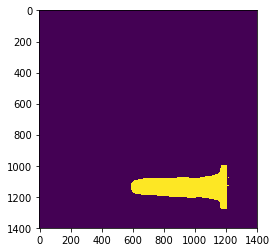

In [20]:
plt.imshow(y[3])

In [12]:
Xy35 = np.load("/storage/yw18581/data/trained_models/UNet_training_generator_1500epochs/Xy_35mm_clean_predicted_UNet.npz")

In [13]:
x35 =Xy35["x"]
y35 = Xy35["y"]
d35 = Xy35["dist"]

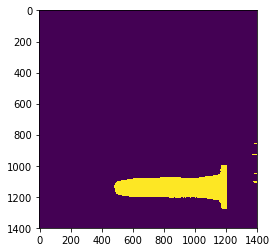

In [21]:
plt.imshow(y35[3])

In [15]:
d35

array([35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35])